#Under their current system, a small number of Santander’s customers receive many recommendations while many others
#rarely see any resulting in an uneven customer experience. In their second competition, 
#Santander is challenging Kagglers to predict which products their existing customers will use in the next month 
#based on their past behavior and that of similar customers. 
#With a more effective recommendation system in place, Santander can better meet the individual needs 
#of all customers and ensure their satisfaction no matter where they are in life.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
sexo - gender
ind_nuevo - is the customer new?
ind_empleado - customer employee status
segmento - segmentation
nomprov - Province name
indext - Foreigner index
indresi - Residence index
indrel - primary customer at beginning but not end of month
tiprel_1mes - Customer relation type at the beginning of the month
ind_actividad_cliente - customer active?
Base numerical features:

age - age in years
antiguedad - seniority in months
renta - gross income

In [4]:
# We have a number of demographics for each individual as well as the products they currently own. 
# To make a test set, we will separate the last month from this training data, 
# and create a feature that indicates whether or not a product was newly purchased. 
# First we have to convert the dates. There's fecha_dato, the row-identifier date, and fecha_alta, the date that the customer joined.

limit_rows   = 7000
df           = pd.read_csv("train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)
unique_ids   = pd.Series(df["ncodpers"].unique())
limit_people = 7000
unique_id    = unique_ids.sample(n=limit_people)
df           = df[df.ncodpers.isin(unique_id)]
df.describe()

,ncodpers,indrel,indrel_1mes,conyuemp,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,7.000000e+03,6965.000000,6965.0,0.0,6965.0,6961.000000,6965.000000,5.674000e+03,7000.0,7000.0,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.0,6994.000000,6994.000000,7000.000000
mean,1.049974e+06,1.084422,1.0,NaN,1.0,25.636403,0.468772,1.078972e+05,0.0,0.0,...,0.000286,0.000857,0.000286,0.012571,0.013714,0.004143,0.0,0.027452,0.030026,0.094714
std,6.073964e+03,2.875313,0.0,NaN,0.0,14.440448,0.499060,1.124726e+05,0.0,0.0,...,0.016902,0.029267,0.016902,0.111423,0.116311,0.064236,0.0,0.163408,0.170670,0.292841
min,1.042162e+06,1.000000,1.0,NaN,1.0,1.000000,0.000000,8.346420e+03,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.044822e+06,1.000000,1.0,NaN,1.0,12.000000,0.000000,6.072940e+04,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.050310e+06,1.000000,1.0,NaN,1.0,28.000000,0.000000,8.640000e+04,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.053950e+06,1.000000,1.0,NaN,1.0,37.000000,1.000000,1.263544e+05,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.375586e+06,99.000000,1.0,NaN,1.0,52.000000,1.000000,5.649552e+06,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [ ]:
#tipodom - Addres type. 1, primary address 
#cod_prov - Province code (customer's address)
#nomprov - the name of the province 
#ncodpers - 

In [5]:
# printed the values just to double check the dates were in standard Year-Month-Day format. 
# we expect that customers will be more likely to buy products at certain months of the year 
# so let's add a month column. we don't think the month that they joined matters

df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["fecha_dato"].unique()


array(['2015-01-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [6]:
df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["age"]   = pd.to_numeric(df["age"], errors="coerce")

In [7]:
# Are there any columns missing values?

df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

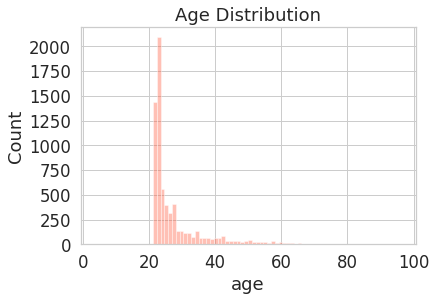

In [10]:
# data cleaning

with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")

In [11]:
# In addition to NA, there are people with very small and very high ages
# It's also interesting that the distribution is bimodal. 
# There are a large number of university aged students, and then another peak around middle-age. 
# Let's separate the distribution and move the outliers to the mean of the closest one.

df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
df.loc[df.age > 100,"age"] = df.loc[(df.age >= 30) & (df.age <= 100),"age"].mean(skipna=True)
df["age"].fillna(df["age"].mean(),inplace=True)
df["age"] = df["age"].astype(int)

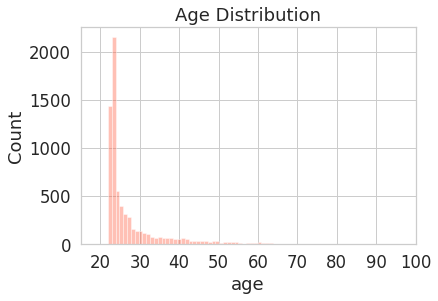

In [12]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

In [13]:
# Next ind_nuevo, which indicates whether a customer is new or not. How many missing values are there?

df["ind_nuevo"].isnull().sum()

35

In [14]:
# Let's see if we can fill in missing values by looking how many months of history these customers have

months_active = df.loc[df["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size()
months_active.max()

1

In [15]:
# Looks like these are all new customers, so replace accordingly - ie 1

df.loc[df["ind_nuevo"].isnull(),"ind_nuevo"] = 1

In [16]:
df.antiguedad = pd.to_numeric(df.antiguedad,errors="coerce")
np.sum(df["antiguedad"].isnull())

# That number again. Probably the same people that we just determined were new customers. Double check.

35

In [17]:
df.loc[df["antiguedad"].isnull(),"ind_nuevo"].describe()

# Yup, same people. Let's give them minimum seniority.

count     35
unique     1
top        1
freq      35
Name: ind_nuevo, dtype: int64

In [18]:
df.loc[df.antiguedad.isnull(),"antiguedad"] = df.antiguedad.min()
df.loc[df.antiguedad <0, "antiguedad"] = 0 

In [19]:
# Some entries don't have the date they joined the company. Just give them something in the middle of the pack

dates=df.loc[:,"fecha_alta"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
df.loc[df.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
df["fecha_alta"].describe()

count                    7000
unique                     63
top       2012-08-06 00:00:00
freq                     1258
first     2005-04-28 00:00:00
last      2015-01-12 00:00:00
Name: fecha_alta, dtype: object

In [21]:
pd.Series([i for i in df.indrel]).value_counts()


1.0     6959
99.0       6
dtype: int64

In [22]:
df.loc[df.indrel.isnull(),"indrel"] = 1


In [ ]:
#Quick check back to see how we are doing on missing values

In [23]:
df.drop(["tipodom","cod_prov"],axis=1,inplace=True)


In [24]:
df.isnull().any()


fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

In [25]:
np.sum(df["ind_actividad_cliente"].isnull())


35

In [ ]:
#By now you've probably noticed that this number keeps popping up. A handful of the entries are just bad,
#and should probably just be excluded from the model. But for now I will just clean/keep them.

In [26]:
df.loc[df.ind_actividad_cliente.isnull(),"ind_actividad_cliente"] = \
df["ind_actividad_cliente"].median()

In [27]:
df.nomprov.unique()

array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'TOLEDO', 'LEON', 'GIPUZKOA',
       'CACERES', 'GIRONA', 'ZAMORA', 'BARCELONA', 'SALAMANCA', 'BURGOS',
       'HUESCA', 'NAVARRA', 'AVILA', 'SEGOVIA', 'LUGO', 'LERIDA',
       'MADRID', 'ALICANTE', 'SORIA', 'SEVILLA', 'CANTABRIA',
       'BALEARS, ILLES', 'VALLADOLID', 'PONTEVEDRA', 'VALENCIA', 'TERUEL',
       'CORUÑA, A', 'OURENSE', 'JAEN', 'CUENCA', 'BIZKAIA', 'CASTELLON',
       'RIOJA, LA', 'ALBACETE', 'BADAJOZ', 'MURCIA', 'CADIZ', nan,
       'ALMERIA', 'GUADALAJARA', 'PALENCIA', 'PALMAS, LAS', 'CORDOBA',
       'HUELVA', 'GRANADA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE',
       'MELILLA', 'TARRAGONA', 'ALAVA', 'CEUTA'], dtype=object)

In [28]:
df.loc[df.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"


In [29]:
df.loc[df.nomprov.isnull(),"nomprov"] = "UNKNOWN" #There's some rows missing a city that we'll relabel

In [30]:
df.renta.isnull().sum()
#Now for gross income, aka renta

1326

In [ ]:
#Here is a feature that is missing a lot of values. Rather than just filling them in with a median, 
#it's probably more accurate to break it down region by region. 
#To that end, let's take a look at the median income by region, and in the spirit of the competition 
#let's color it like the Spanish flag.

In [31]:
incomes = df.loc[df.renta.notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":median}})
incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype("category", categories=[i for i in df.nomprov.unique()],ordered=False)
incomes.head()


/home/ibab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.


,nomprov,renta
,,MedianIncome
0,CIUDAD REAL,58682.340
1,JAEN,58926.510
2,BADAJOZ,59850.030
3,MURCIA,60621.705
4,TERUEL,61222.920


/home/ibab/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ibab/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.YTick at 0x7f9a6d67c0b8>,
 <a list of 5 Text yticklabel objects>)

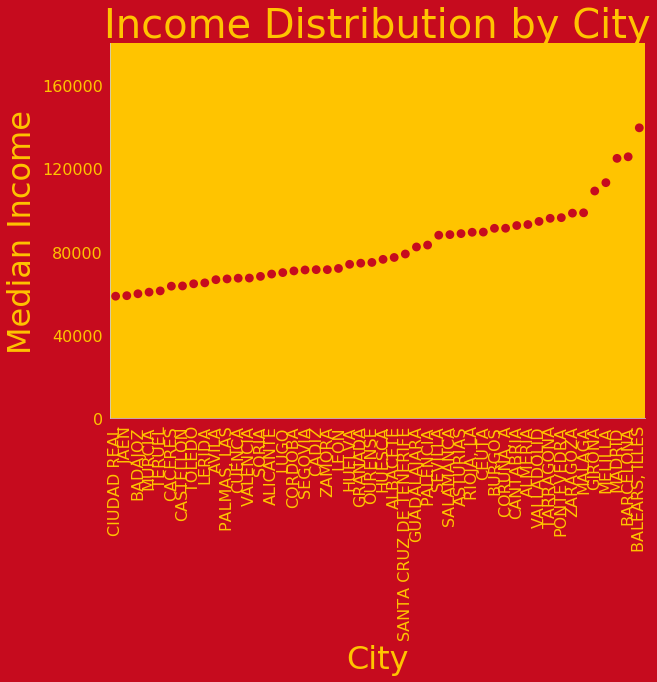

In [32]:
with sns.axes_style({
        "axes.facecolor":   "#ffc400",
        "axes.grid"     :    False,
        "figure.facecolor": "#c60b1e"}):
    h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   color="#c60b1e",
                   linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=16,labelcolor="#ffc400")#
plt.ylabel("Median Income",size=32,color="#ffc400")
plt.xlabel("City",size=32,color="#ffc400")
plt.title("Income Distribution by City",size=40,color="#ffc400")
plt.ylim(0,180000)
plt.yticks(range(0,180000,40000))